In [3]:
setwd("C:/Work/training/ML")


In [4]:
mydata = read.csv('MFA_patient.csv', header=TRUE, stringsAsFactors=FALSE, sep=',')

In [5]:
head(mydata)

ï..HastaNumber,Cinsiyet,Beck.Skor,Dominant.el,EÄŸitim.durumu,HastalÄ.k.sÃ.resi,Liebowitz.skor...KaygÄ..KaÃ.Ä.nma.,NÃ.bet.tipi,Yas
1,E,5,saÄŸ,ilkokul,8 yÄ±l,35+24=59,JTKN,24
2,K,14,saÄŸ,ilkokul,13 yÄ±l,41+41=82,JTKN,22
3,K,26,saÄŸ,ilkokul,13 yÄ±l,47+44=91,"absans, JTKN",43
4,K,9,sol,ortaokul,3 yÄ±l,44+43=87,saÄŸ fokal motor seconder jeneralize,52
5,E,19,saÄŸ,lise,12 yÄ±l,57+51=108,KPN,25
6,E,27,saÄŸ,lise,3 yÄ±l,54+53=107,KPN,27


In [6]:
names(mydata)<-c("PatientNo","Gender","BeckScore","Hand","education","Duration","Liebowitz","Nobet","Age")


In [7]:
head(mydata)


PatientNo,Gender,BeckScore,Hand,education,Duration,Liebowitz,Nobet,Age
1,E,5,saÄŸ,ilkokul,8 yÄ±l,35+24=59,JTKN,24
2,K,14,saÄŸ,ilkokul,13 yÄ±l,41+41=82,JTKN,22
3,K,26,saÄŸ,ilkokul,13 yÄ±l,47+44=91,"absans, JTKN",43
4,K,9,sol,ortaokul,3 yÄ±l,44+43=87,saÄŸ fokal motor seconder jeneralize,52
5,E,19,saÄŸ,lise,12 yÄ±l,57+51=108,KPN,25
6,E,27,saÄŸ,lise,3 yÄ±l,54+53=107,KPN,27


In [8]:
mydata[mydata[,"Hand"]=="saÄŸ","Hand"]<-"Sağ"

In [9]:
class(mydata[,"Hand"])

[1] "character"

In [10]:
str(mydata[,"Hand"])

 chr [1:150] "Sağ" "Sağ" "Sağ" "sol" "Sağ" "Sağ" "Sağ" "Sağ" "sol" "Sağ" ...


In [12]:
summary(mydata)

   PatientNo         Gender            BeckScore         Hand          
 Min.   :  1.00   Length:150         Min.   : 0.00   Length:150        
 1st Qu.: 38.25   Class :character   1st Qu.: 5.25   Class :character  
 Median :116.50   Mode  :character   Median :12.00   Mode  :character  
 Mean   :104.83                      Mean   :15.19                     
 3rd Qu.:153.75                      3rd Qu.:23.00                     
 Max.   :191.00                      Max.   :54.00                     
  education           Duration          Liebowitz            Nobet          
 Length:150         Length:150         Length:150         Length:150        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                  

In [15]:
# shapiro.test(mydata[mydata[,"Gender"]=="K","BeckScore"])
shapiro.test(mydata[,"BeckScore"])
shapiro.test(mydata[mydata[,"Gender"]=="E","BeckScore"])
shapiro.test(mydata[mydata[,"Gender"]=="K","BeckScore"])



	Shapiro-Wilk normality test

data:  mydata[, "BeckScore"]
W = 0.91899, p-value = 1.828e-07



	Shapiro-Wilk normality test

data:  mydata[mydata[, "Gender"] == "E", "BeckScore"]
W = 0.90722, p-value = 0.0003961



	Shapiro-Wilk normality test

data:  mydata[mydata[, "Gender"] == "K", "BeckScore"]
W = 0.91348, p-value = 1.153e-05


In [113]:
if(!require("ggplot2", quietly = TRUE)) install.packages("ggplot2",repos='http://cran.us.r-project.org')
library(ggplot2, quietly = TRUE)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


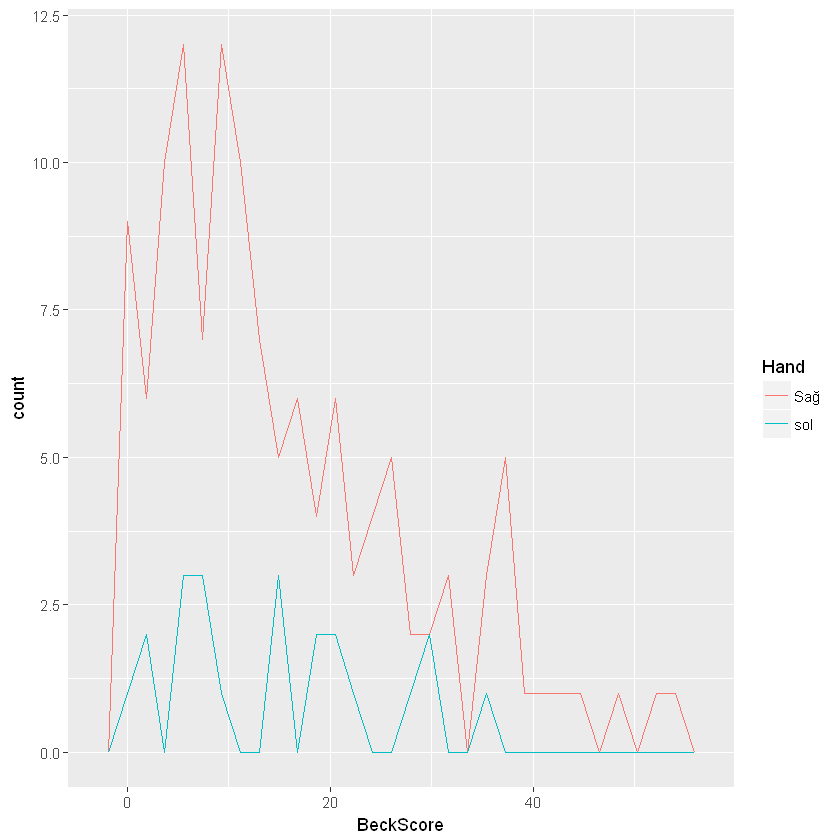

In [130]:
g<-ggplot(mydata, aes(BeckScore,colour= Hand))
g + geom_freqpoly()

In [22]:
mydata[,2]<-factor(mydata[,2])
mydata[,2]

[1] E K K K E E E E K K K K K K K K E K K K E E K K K E K E E K E K K K K K K
 [38] E K E E K E K K K E K K E E K E E E E K E K K E E E E E E K E K K K E E K
 [75] K K K K K K E E K E E K E K K K E E K K K E K K E K E E K K E E K E K K K
[112] K K K K E K K K K K K E K K K K K K K E K K K E K K K E E E K K K K E K K
[149] K E
Levels: E K

In [106]:
summary(mydata)

  PatientNo             Gender   BeckScore         Hand    education
 Length:151         Min.   :1   Length:151         0:128   0: 1     
 Class :character   1st Qu.:1   Class :character   1: 23   1:53     
 Mode  :character   Median :1   Mode  :character           2:21     
                    Mean   :1                              3:43     
                    3rd Qu.:1                              4:33     
                    Max.   :1                                       
   Duration          Liebowitz            Nobet               Age           
 Length:151         Length:151         Length:151         Length:151        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                       

In [33]:
mydata[,"Gender"]<-factor(mydata[,"Gender"],labels=c(0,1))

In [34]:
mydata[,"Gender"]

[1] 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1
 [38] 0 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1
 [75] 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 0 1 0 1 1 1
[112] 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1
[149] 1 0
Levels: 0 1

In [35]:
summary(mydata)

   PatientNo      Gender   BeckScore         Hand            education        
 Min.   :  1.00   0:56   Min.   : 0.00   Length:150         Length:150        
 1st Qu.: 38.25   1:94   1st Qu.: 5.25   Class :character   Class :character  
 Median :116.50          Median :12.00   Mode  :character   Mode  :character  
 Mean   :104.83          Mean   :15.19                                        
 3rd Qu.:153.75          3rd Qu.:23.00                                        
 Max.   :191.00          Max.   :54.00                                        
   Duration          Liebowitz            Nobet                Age       
 Length:150         Length:150         Length:150         Min.   :18.00  
 Class :character   Class :character   Class :character   1st Qu.:25.00  
 Mode  :character   Mode  :character   Mode  :character   Median :32.00  
                                                          Mean   :34.17  
                                                          3rd Qu.:43.00  
   

In [38]:
mydata[,"Hand"]<- factor(mydata[,"Hand"],labels=c(0,1))
mydata[,"Hand"]

[1] 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1
 [38] 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 [75] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
[149] 0 0
Levels: 0 1

In [39]:
mydata

PatientNo,Gender,BeckScore,Hand,education,Duration,Liebowitz,Nobet,Age
1,0,5,0,ilkokul,8 yÄ±l,35+24=59,JTKN,24
2,1,14,0,ilkokul,13 yÄ±l,41+41=82,JTKN,22
3,1,26,0,ilkokul,13 yÄ±l,47+44=91,"absans, JTKN",43
4,1,9,1,ortaokul,3 yÄ±l,44+43=87,saÄŸ fokal motor seconder jeneralize,52
5,0,19,0,lise,12 yÄ±l,57+51=108,KPN,25
6,0,27,0,lise,3 yÄ±l,54+53=107,KPN,27
7,0,11,0,ilkokul,17 yÄ±l,32+27=59,KPN,45
8,0,38,0,ilkokul,10 yÄ±l,42+37=79,"Absans, KPN",31
9,1,18,1,ortaokul,3 yÄ±l,33+29=62,JTKN,23
10,1,45,0,ilkokul,22 yÄ±l,66+61=127,KPN,35


In [40]:
mydata[,"education"] <- factor(mydata[,"education"],levels=c("okuryazar","ilkokul","ortaokul","lise","Ã¼niversite"),labels=c(0,1,2,3,4),ordered =TRUE)
mydata[,"education"]

[1] 1 1 1 2 3 3 1 1 2 1 3 4 4 3 2 3 1 1 4 4 1 1 3 4 1 2 1 3 4 4 2 4 3 1 3 1 3
 [38] 1 1 4 4 1 2 2 1 4 1 3 3 2 4 1 1 4 1 3 3 2 1 3 1 0 2 3 3 1 3 3 2 1 1 4 3 3
 [75] 1 3 1 4 1 2 3 2 3 4 2 1 3 3 4 2 4 3 4 1 1 2 3 1 4 1 3 4 3 1 2 1 4 4 4 4 2
[112] 3 3 1 2 3 1 3 1 1 4 1 1 3 3 3 1 1 1 1 1 2 4 3 3 1 3 4 4 3 3 4 4 1 1 4 2 1
[149] 3 4
Levels: 0 < 1 < 2 < 3 < 4

In [41]:
head(mydata)

PatientNo,Gender,BeckScore,Hand,education,Duration,Liebowitz,Nobet,Age
1,0,5,0,1,8 yÄ±l,35+24=59,JTKN,24
2,1,14,0,1,13 yÄ±l,41+41=82,JTKN,22
3,1,26,0,1,13 yÄ±l,47+44=91,"absans, JTKN",43
4,1,9,1,2,3 yÄ±l,44+43=87,saÄŸ fokal motor seconder jeneralize,52
5,0,19,0,3,12 yÄ±l,57+51=108,KPN,25
6,0,27,0,3,3 yÄ±l,54+53=107,KPN,27


In [59]:
install.packages('corrplot', repos='http://cran.us.r-project.org')
library(corrplot)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\saygina\AppData\Local\Temp\RtmpsTQ9gw\downloaded_packages


Warning message:
"package 'corrplot' was built under R version 3.4.3"corrplot 0.84 loaded


In [46]:
summary(mydata)


   PatientNo      Gender   BeckScore     Hand    education   Duration        
 Min.   :  1.00   0:56   Min.   : 0.00   0:128   0: 1      Length:150        
 1st Qu.: 38.25   1:94   1st Qu.: 5.25   1: 22   1:52      Class :character  
 Median :116.50          Median :12.00           2:21      Mode  :character  
 Mean   :104.83          Mean   :15.19           3:43                        
 3rd Qu.:153.75          3rd Qu.:23.00           4:33                        
 Max.   :191.00          Max.   :54.00                                       
  Liebowitz            Nobet                Age       
 Length:150         Length:150         Min.   :18.00  
 Class :character   Class :character   1st Qu.:25.00  
 Mode  :character   Mode  :character   Median :32.00  
                                       Mean   :34.17  
                                       3rd Qu.:43.00  
                                       Max.   :66.00  

In [51]:
MD <- mydata[,c("Gender","Hand","education")]


ERROR: Error in corrplot(cor(MD)): "corrplot" fonksiyonu bulunamadı


In [89]:
t.test(as.numeric(mydata[mydata[,"Hand"]==1,"BeckScore"]),as.numeric(mydata[mydata[,"Hand"]==0,"BeckScore"]),paired=F,alternative ="two.sided")


	Welch Two Sample t-test

data:  as.numeric(mydata[mydata[, "Hand"] == 1, "BeckScore"]) and as.numeric(mydata[mydata[, "Hand"] == 0, "BeckScore"])
t = -0.61156, df = 34.633, p-value = 0.5448
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.456235  3.467784
sample estimates:
mean of x mean of y 
 13.82609  15.32031 


In [88]:
summary(mydata)

  PatientNo             Gender   BeckScore         Hand    education
 Length:151         Min.   :1   Length:151         0:128   0: 1     
 Class :character   1st Qu.:1   Class :character   1: 23   1:53     
 Mode  :character   Median :1   Mode  :character           2:21     
                    Mean   :1                              3:43     
                    3rd Qu.:1                              4:33     
                    Max.   :1                                       
   Duration          Liebowitz            Nobet               Age           
 Length:151         Length:151         Length:151         Length:151        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                       

In [96]:
if(!require("ggplot2", quietly = TRUE)) install.packages("ggplot2",repos='http://cran.us.r-project.org')
library(ggplot2, quietly = TRUE)

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'ggplot2'"also installing the dependencies 'assertthat', 'colorspace', 'cli', 'utf8', 'Rcpp', 'RColorBrewer', 'dichromat', 'munsell', 'labeling', 'viridisLite', 'pillar', 'rlang', 'gtable', 'MASS', 'plyr', 'reshape2', 'scales', 'tibble', 'lazyeval'



package 'assertthat' successfully unpacked and MD5 sums checked
package 'colorspace' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'utf8' successfully unpacked and MD5 sums checked
package 'Rcpp' successfully unpacked and MD5 sums checked
package 'RColorBrewer' successfully unpacked and MD5 sums checked
package 'dichromat' successfully unpacked and MD5 sums checked
package 'munsell' successfully unpacked and MD5 sums checked
package 'labeling' successfully unpacked and MD5 sums checked
package 'viridisLite' successfully unpacked and MD5 sums checked
package 'pillar' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked
package 'gtable' successfully unpacked and MD5 sums checked
package 'MASS' successfully unpacked and MD5 sums checked
package 'plyr' successfully unpacked and MD5 sums checked
package 'reshape2' successfully unpacked and MD5 sums checked
package 'scales' successf

Warning message:
"package 'ggplot2' was built under R version 3.4.3"

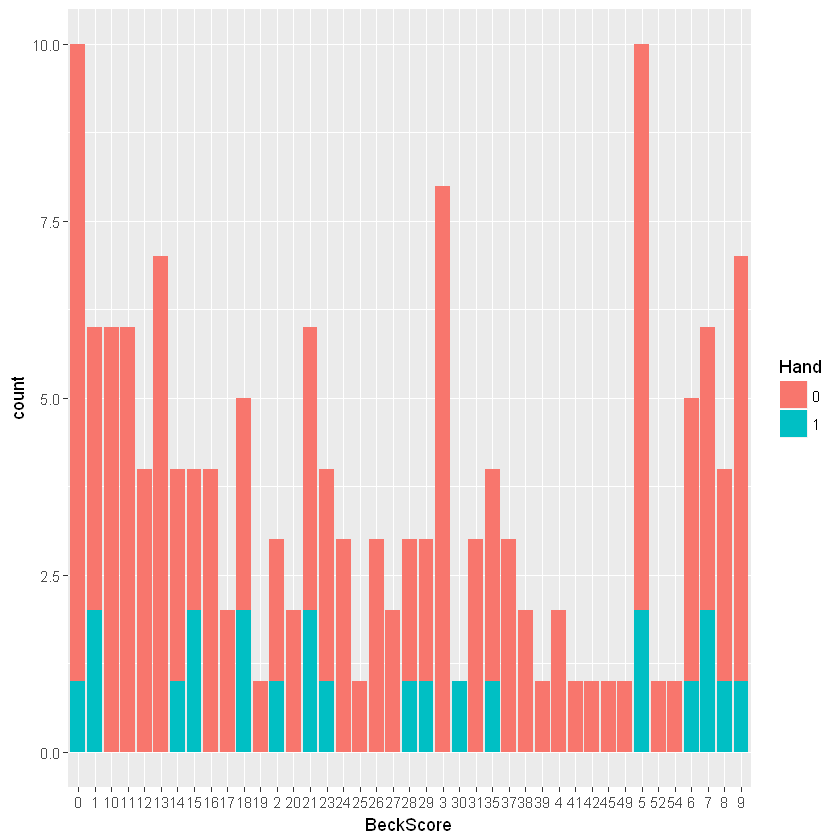

In [105]:
g <- ggplot(mydata, aes(BeckScore, fill=Hand)) 
g + geom_bar()